In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cmocean as cmo
import seawater as sw
import sys
sys.path.append('../')
import src.data.export_log_data as efuncs
import src.data.read_functions as rfuncs


In [2]:
# root dir
rootpath = os.path.dirname(os.getcwd())

# outpath
outpath = os.path.join(rootpath,'data','processed')

# missioname
missionname='20230119_ArdBay_NM'

# project folder
projects ='AUV Projects 2023'

## if working off the SAMS servers:
samserv=os.path.join('x:','SONAR ARCHIVE','AUV')

# mission files directory
missiondir=os.path.join(samserv,projects,missionname,'files','missions')

# log files directory
logdir=os.path.join(samserv,projects,missionname,'files','log')

# make folder for processed data
processedpath=os.path.join(outpath,missionname)
os.makedirs(processedpath, exist_ok=True)  

# other raw data (e.g. ctd data)
rawpath=os.path.join(rootpath,'data','raw')

#### Read mission data 

In [3]:
mfiles=os.path.join(missiondir,'*'+missionname+'*.xml')
flelist=glob.glob(mfiles)
mdata=pd.read_xml(flelist[0])

In [4]:
mdata

,name,locked,bottomtrack,speed-rpm,start-devices,location,width,angle,crossangle,spacing,alternation,count,run-devices,shadow,postdelay,constdepth
0,20230119_ArdBay_NM_Launch,0,NaN,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
1,20230119_ArdBay_NM_Transit_01,0,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
2,20230119_ArdBay_NM_Transit_02,0,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
3,GS_SBP_Sci_50,1,7.5,650.0,NaN,NaN,150.0,55.0,145.0,30.0,0.5,3.0,NaN,None,NaN,NaN
4,None,1,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true,0.0,NaN
5,None,1,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true,0.0,NaN
6,None,1,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true,0.0,NaN
7,None,1,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true,0.0,NaN
8,None,1,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true,0.0,NaN
9,None,1,NaN,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true,0.0,NaN


#### Load the Gavia data
Load from the **mission/log** folder as the Slocum-CTD files have no timestamp information

Uses functions to read .xml files and unpack to pandas like data frames


In [5]:
# call the GAVIA data
missionname='20230119_ArdBay_NM'
# log files directory
logdir=os.path.join('x:','SONAR ARCHIVE','AUV','AUV Projects 2023',missionname,'files','log')

nvdf, ctdf, aandf, sbpdf, gpdf = efuncs.export_log_data(missionname,logdir,processedpath)

#### convert pressure to depth in the ctd data 

In [6]:
# approximate latitude as 55
lat=55
ctdf['Depth'] = sw.eos80.dpth(ctdf['pressure'], lat)

### Read the 1-m binned ascii data from the Sbe19plusv2

In [8]:
# get 1 m averaged data from CTD cast
ddir=os.path.join(rawpath,'2023-20-10-GAVIAtrials/*00[0-9]*1m.asc')
alldata=rfuncs.concat_ascii_data(ddir)

#### Plot the salinity output from the SVS? 

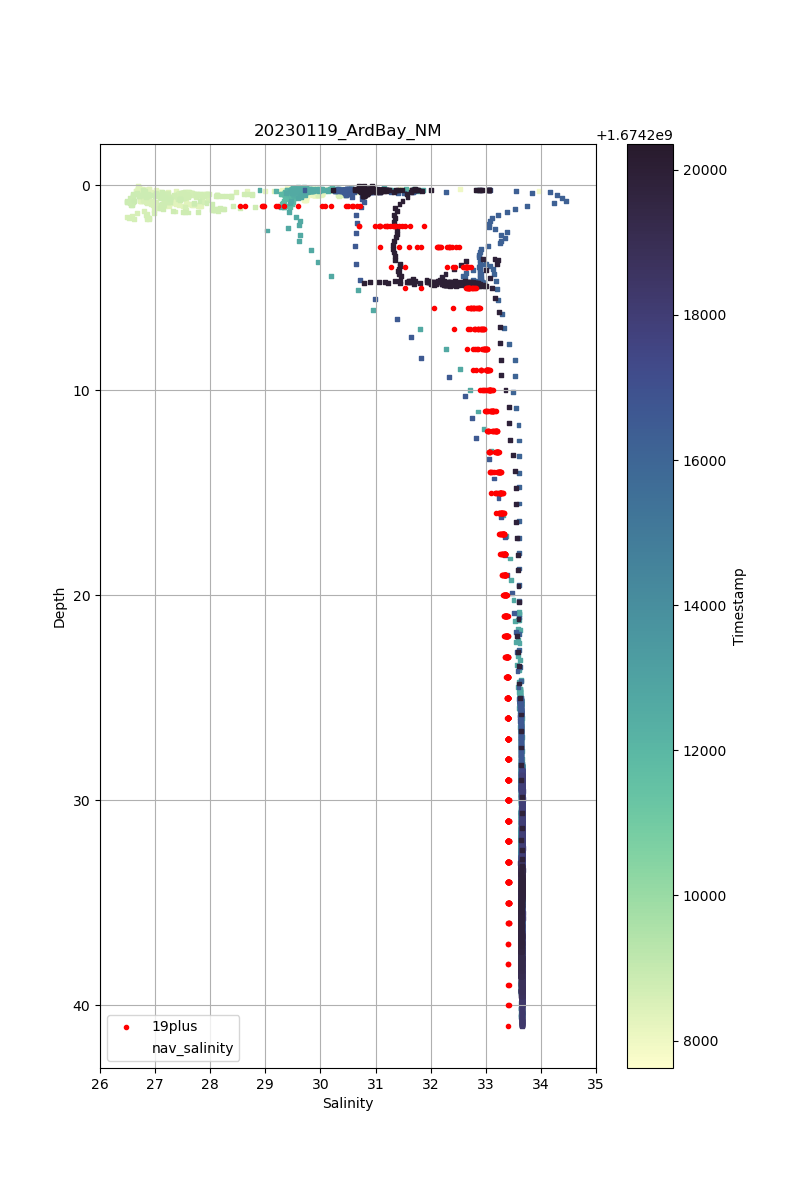

In [10]:
def plot_sal(alldata,nvdf,missionname):
    # extract some data for plotting
    csal=alldata['Sal00']
    cdep=alldata['DepSM']
    gdep=nvdf['Depth']
    gsal=nvdf['salinity']
    gtime=nvdf['timestamp']
    fig,ax = plt.subplots(figsize=[8,12])
    ax.plot(csal,cdep,'r.',label='19plus')
    sc=ax.scatter(gsal,gdep,s=8,marker='s',c=gtime,cmap=cmo.cm.deep,label='nav_salinity')
    ax.grid(True)
    ax.set_xlabel('Salinity')
    ax.set_ylabel('Depth')
    ax.invert_yaxis()
    ax.set_title(missionname)
    ax.legend()
    fig.colorbar(sc, ax=ax, label='Timestamp')
    ax.set_xlim(26,35)
    
%matplotlib widget
plot_sal(alldata,nvdf,missionname)
figfile=os.path.join(processedpath,'NavSalinity_vs_19plus')
plt.savefig(figfile)  

#### There is a fairly consistent offset from around 5 m below the surface to deepest measurement, now try the data from the "slocum-ctd"

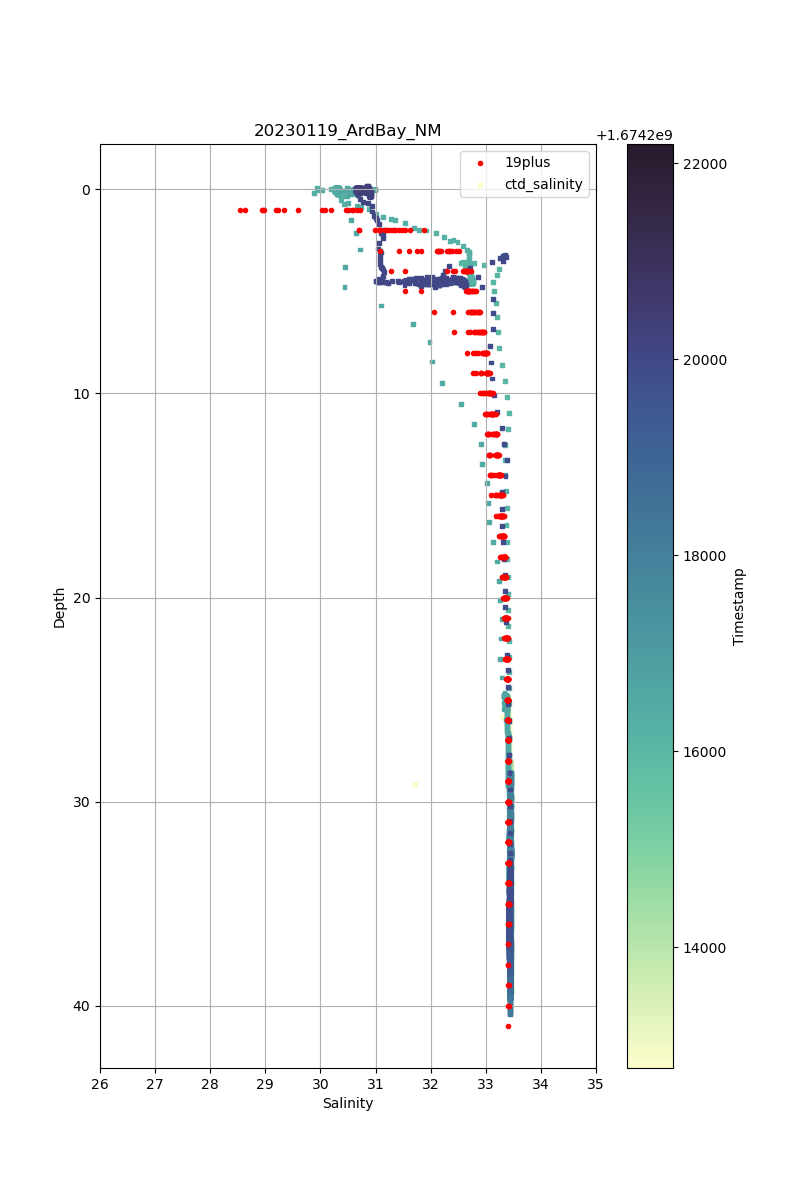

In [11]:
def plot_ctd(alldata,ctdf,missionname):
    # extract some data for plotting
    csal=alldata['Sal00']
    cdep=alldata['DepSM']
    gsal=ctdf['salinity']
    gdep =ctdf['Depth']
    gtime=ctdf['timestamp']
    fig,ax = plt.subplots(figsize=[8,12])
    ax.plot(csal,cdep,'r.',label='19plus')
    sc=ax.scatter(gsal,gdep,s=8,marker='s',c=gtime,cmap=cmo.cm.deep,label='ctd_salinity')
    ax.grid(True)
    ax.set_xlabel('Salinity')
    ax.set_ylabel('Depth')
    ax.invert_yaxis()
    ax.set_title(missionname)
    ax.legend()
    fig.colorbar(sc, ax=ax, label='Timestamp')
    ax.set_xlim(26,35)
%matplotlib widget
plot_ctd(alldata,ctdf,missionname)
figfile=os.path.join(processedpath,'CTDSalinity_vs_19plus')
plt.savefig(figfile)  

**Looking pretty good, actually. Suggest that travelling vertically (i.e. while diving) the sensor is not fast enough to compensate for the strong gradients. Now try some temperature.....**

#### Plot the Temperature output from the SVS? 

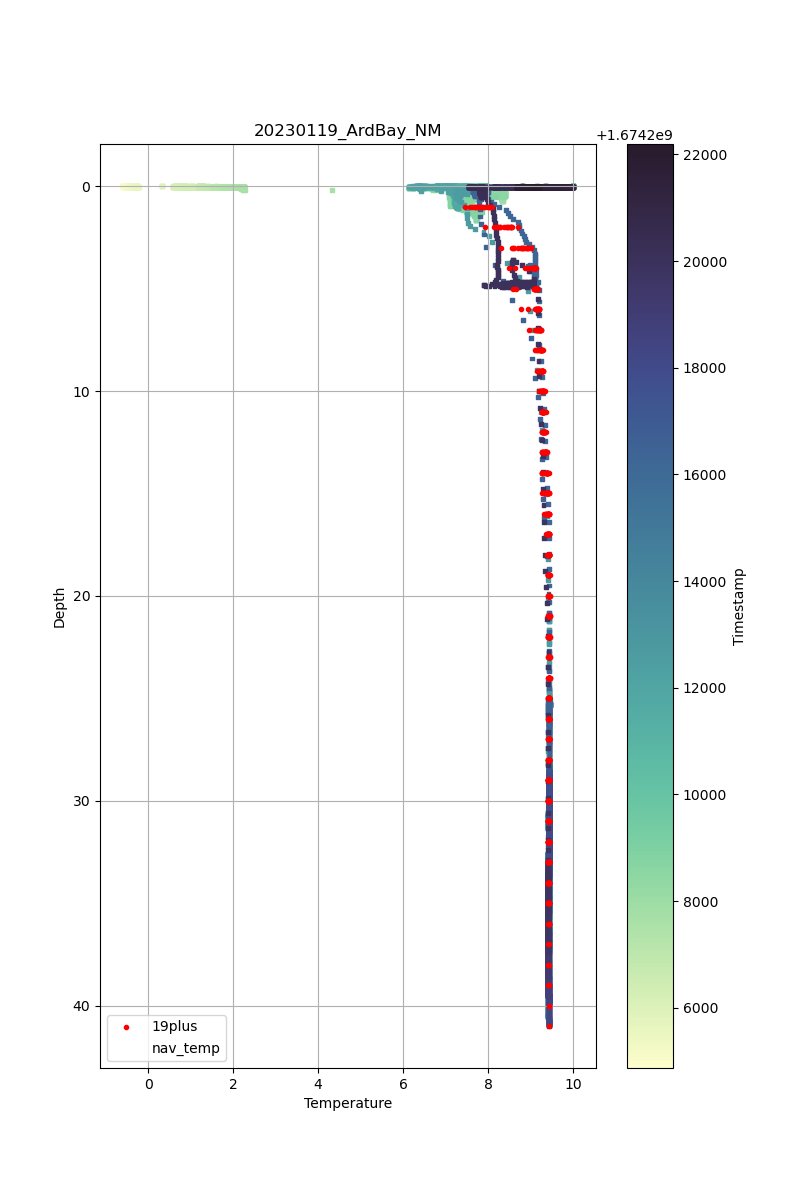

In [12]:
def plot_temp(alldata,nvdf,missionname):
    # extract some data for plotting
    csal=alldata['Tv290C']
    cdep=alldata['DepSM']
    gdep=nvdf['Depth']
    gsal=nvdf['temperature']
    gtime=nvdf['timestamp']
    fig,ax = plt.subplots(figsize=[8,12])
    ax.plot(csal,cdep,'r.',label='19plus')
    sc=ax.scatter(gsal,gdep,s=8,marker='s',c=gtime,cmap=cmo.cm.deep,label='nav_temp')
    ax.grid(True)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Depth')
    ax.invert_yaxis()
    ax.set_title(missionname)
    ax.legend()
    fig.colorbar(sc, ax=ax, label='Timestamp')
    
%matplotlib widget
plot_temp(alldata,nvdf,missionname)
figfile=os.path.join(processedpath,'NavTemp_vs_19plus')
plt.savefig(figfile)  

#### Plot the Temperature output from the slocum-ctd

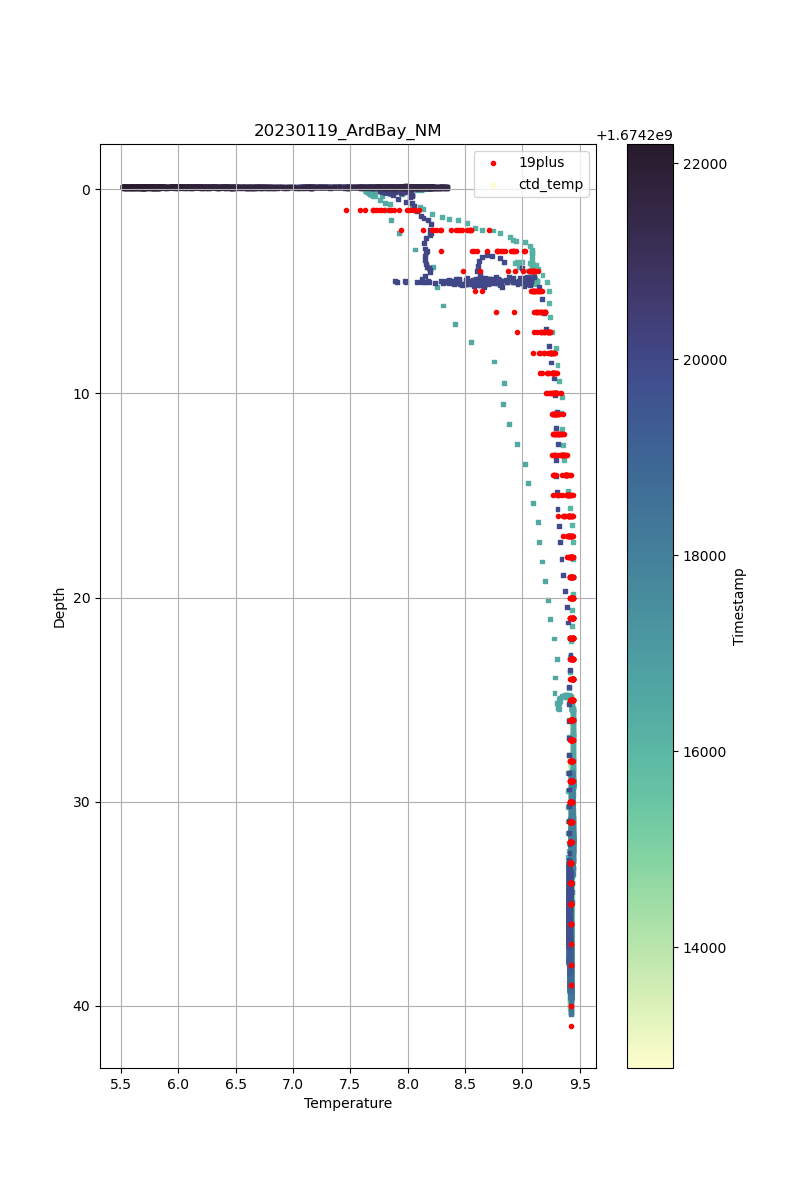

In [13]:
def plot_temp(alldata,ctdf,missionname):
    # extract some data for plotting
    csal=alldata['Tv290C']
    cdep=alldata['DepSM']
    gdep =ctdf['Depth']
    gtime=ctdf['timestamp']
    gsal=ctdf['temperature']
    fig,ax = plt.subplots(figsize=[8,12])
    ax.plot(csal,cdep,'r.',label='19plus')
    sc=ax.scatter(gsal,gdep,s=8,marker='s',c=gtime,cmap=cmo.cm.deep,label='ctd_temp')
    ax.grid(True)
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Depth')
    ax.invert_yaxis()
    ax.set_title(missionname)
    ax.legend()
    fig.colorbar(sc, ax=ax, label='Timestamp')
    
%matplotlib widget
plot_temp(alldata,ctdf,missionname)
figfile=os.path.join(processedpath,'CTDTemp_vs_19plus')
plt.savefig(figfile)  

### Calulate mean and SD
The data look fine but we can compare to mean and satndard deviation to see.
Let's assume that the data from above 30 m depth are not relevent dato our analysis. This is becasue the AUV was either in transit or heaing from/to deployment or recovery. 

One approach would be to apply an ooffest based on the avergae difference between sensors at some stable part of the water column. From the profiling CTD we can see thta the water column is atable from ~30m. 

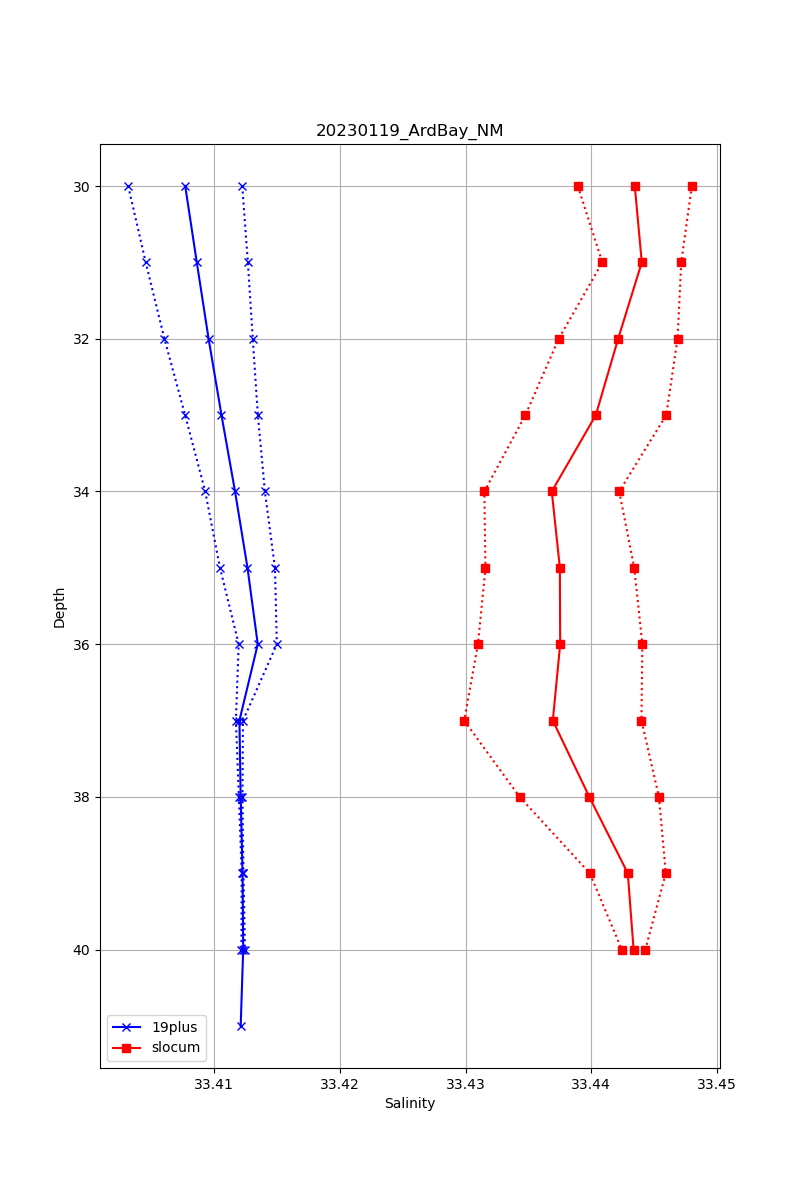

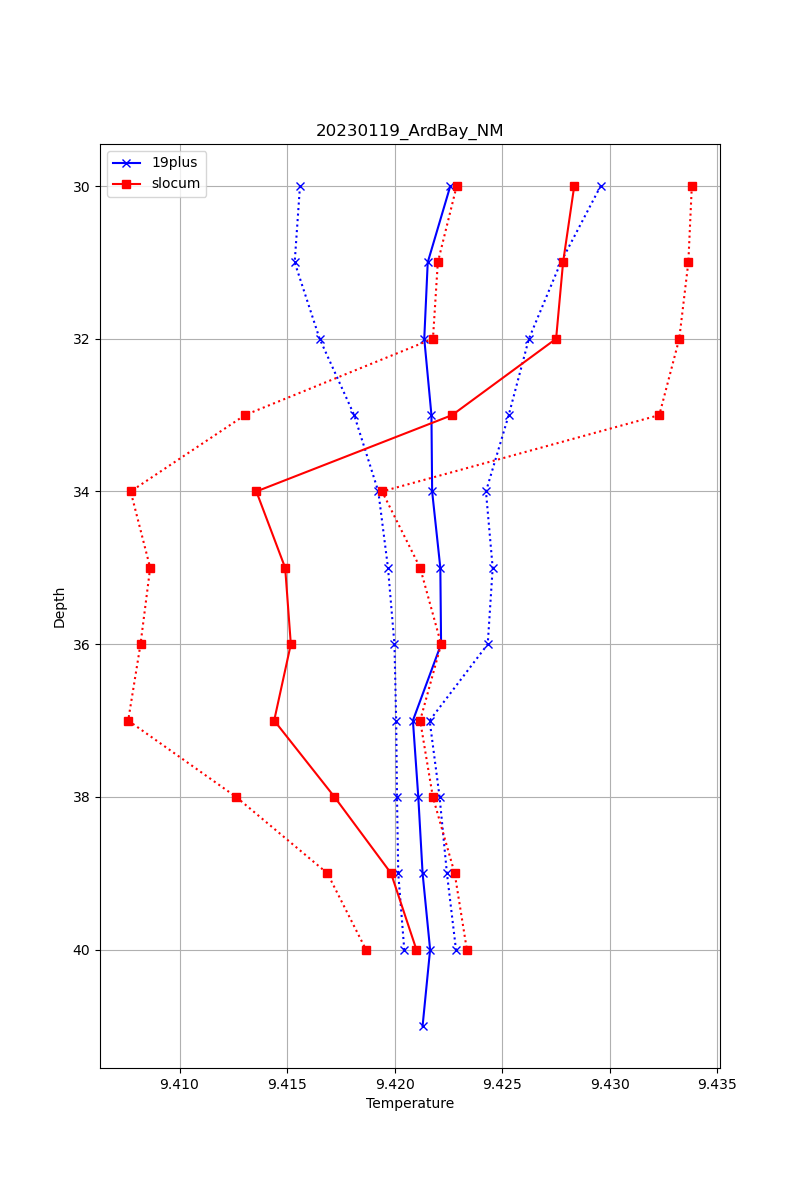

In [15]:
# first lets get all 19plus data and remove surface values
CutoffDepth=30

## SALINITY
deep19data=alldata
deep19data=deep19data.loc[(deep19data['DepSM'] >= CutoffDepth)]
uds = deep19data['DepSM'].unique()
deep19data.groupby(['DepSM'])

ctdsal = deep19data.groupby('DepSM')['Sal00'].agg(['mean','std']).reset_index()

deepslocdata=ctdf.round({'Depth': 0})
deepslocdata=deepslocdata.loc[(deepslocdata['Depth'] >= CutoffDepth)]
slocsal = deepslocdata.groupby('Depth')['salinity'].agg(['mean','std']).reset_index()



fig,ax = plt.subplots(figsize=[8,12])
ax.plot(ctdsal['mean'],ctdsal['DepSM'],'bx-',label='19plus')
ax.plot(ctdsal['mean']-ctdsal['std'],ctdsal['DepSM'],'bx:')
ax.plot(ctdsal['mean']+ctdsal['std'],ctdsal['DepSM'],'bx:')

ax.plot(slocsal['mean'],slocsal['Depth'],'rs-',label='slocum')
ax.plot(slocsal['mean']-slocsal['std'],slocsal['Depth'],'rs:')
ax.plot(slocsal['mean']+slocsal['std'],slocsal['Depth'],'rs:')

ax.grid(True)
ax.set_xlabel('Salinity')
ax.set_ylabel('Depth')
ax.invert_yaxis()
ax.set_title(missionname)
ax.legend()

figfile=os.path.join(processedpath,'mean_sd_CTDSal_vs_19plus')
plt.savefig(figfile)  


## TEMPERATURE
deep19data=alldata
deep19data=deep19data.loc[(deep19data['DepSM'] >= CutoffDepth)]
uds = deep19data['DepSM'].unique()
deep19data.groupby(['DepSM'])

ctdsal = deep19data.groupby('DepSM')['Tv290C'].agg(['mean','std']).reset_index()

deepslocdata=ctdf.round({'Depth': 0})
deepslocdata=deepslocdata.loc[(deepslocdata['Depth'] >= CutoffDepth)]
slocsal = deepslocdata.groupby('Depth')['temperature'].agg(['mean','std']).reset_index()



fig,ax = plt.subplots(figsize=[8,12])
ax.plot(ctdsal['mean'],ctdsal['DepSM'],'bx-',label='19plus')
ax.plot(ctdsal['mean']-ctdsal['std'],ctdsal['DepSM'],'bx:')
ax.plot(ctdsal['mean']+ctdsal['std'],ctdsal['DepSM'],'bx:')

ax.plot(slocsal['mean'],slocsal['Depth'],'rs-',label='slocum')
ax.plot(slocsal['mean']-slocsal['std'],slocsal['Depth'],'rs:')
ax.plot(slocsal['mean']+slocsal['std'],slocsal['Depth'],'rs:')

ax.grid(True)
ax.set_xlabel('Temperature')
ax.set_ylabel('Depth')
ax.invert_yaxis()
ax.set_title(missionname)
ax.legend()

figfile=os.path.join(processedpath,'mean_sd_CTDTemp_vs_19plus')
plt.savefig(figfile)  